## importing modules

In [1]:
from ImageDataIO import *
from SpineSegAndQuantify import *
from ImagePreprocessing import *
import matplotlib.pyplot as plt
import pandas as pd

## import nd2 data and annotation data

In [2]:
# import data
data = ND2ImageLoading()

** Loading image file: data/raw_nd2_image.nd2
** Loading image annotation file: data/raw_nd2_image.csv
** Loading metadata
** cropping image
** rotating image


## preprocessing

In [3]:
# preprocessing
preprocess = ImagePreprocessing(data)

** Loading data
** Intropolating image
** Normalizing image
** Thresholding


## spine segmentation and quantification

In [4]:
# segmentation and quantification
postprocess = SpineSegmentationAndQuantification(preprocess)

** Processing spine segmentation
** Calculating metrics
Computing metrics in  Shaft
Computing metrics in  Spine
Computing metrics in  Neck
Computing metrics in  Head


## e.g. quantification results

In [5]:
# quantification results
postprocess.df_measurement_result.head(4)

Object  Volume(um^3)  SurfaceArea(um^2)  Length(um)  SectionArea(um^2)  \
0  Shaft      0.421414           5.398673    2.857700           0.137656   
0  Spine      0.723520           6.166576    2.006437           0.308614   
0   Neck      0.706108           6.040339    1.942467           0.325304   
0   Head      0.017413           0.678431    0.103335           0.092789   

   SectionDiameter(um)  SpineBaseAngle(degree)  ConvexHullRatio  
0             0.418651               36.432161         1.259544  
0             0.626849               36.432161         0.464495  
0             0.643576               36.432161         0.469573  
0             0.343719               36.432161         0.271863

## e.g. raw data visualization (max-pooling)

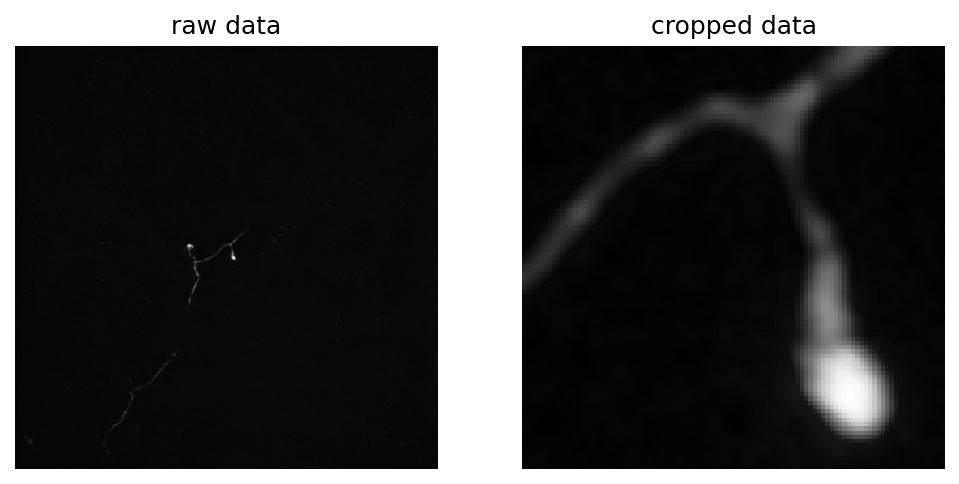

In [6]:
# data visualization (max-pooling)
fig,axs = plt.subplots(1,2,figsize=[8,4],dpi=150)
ax = axs[0]
im_zstack = data.im.max(axis=0)
ax.imshow(im_zstack,cmap='Greys_r')
ax.set_title('raw data')
ax.axis('off')

ax = axs[1]
im_zstack = data.im_crop.max(axis=0)
ax.imshow(im_zstack,cmap='Greys_r')
ax.set_title('cropped data')
ax.axis('off');

## e.g. 3D sample segmented spine visualization (using plotl)
================
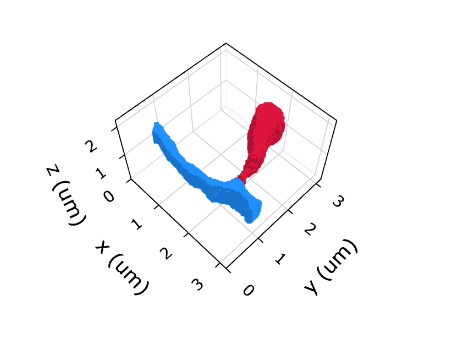

================

In [7]:
# 3D visualization of segmented sample (using plotly package)
postprocess.plotting_3D_spine_sample_two_seg()

## e.g. multi-thresholding and active contour for each z-slice

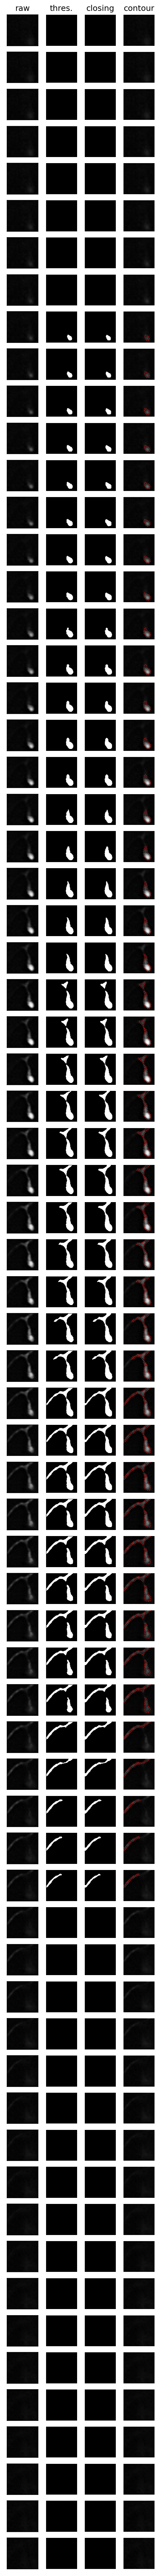

In [8]:
# thresholding visualization
preprocess.plot_thresholding()

In [9]:
# END